In [118]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
os.environ["OMP_NUM_THREADS"] = '1'
X, y = make_blobs()

k = 3
kmean = KMeans(n_clusters=k, random_state=42)
y_pred = kmean.fit_predict(X)

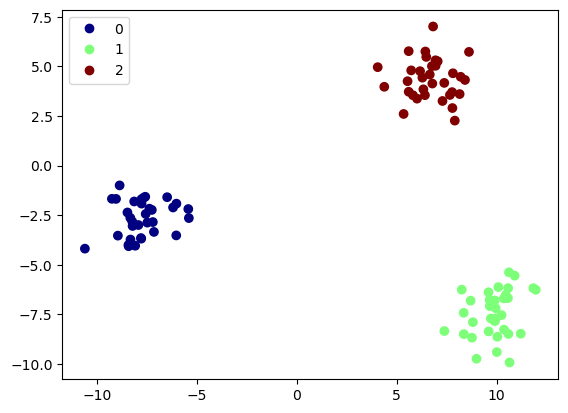

In [119]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X[:, 0], X[:, 1], cmap='jet', c=y_pred)
plt.legend(*scatter.legend_elements(), loc="upper left")
plt.show()

In [120]:
print(y_pred)
y_pred is kmean.labels_

[1 2 1 1 0 2 2 1 0 0 0 2 1 1 2 0 1 2 0 1 2 0 0 1 1 2 1 1 1 1 1 0 0 0 1 2 0
 1 1 2 2 1 0 2 2 1 1 2 0 2 0 0 2 2 2 2 0 2 0 1 0 0 0 0 0 1 2 2 0 0 2 2 0 0
 0 1 1 1 2 2 2 1 1 2 0 2 2 1 1 1 2 2 0 1 0 1 2 0 1 0]


True

In [121]:
kmean.cluster_centers_

array([[-7.73976271, -2.65314011],
       [ 9.88011553, -7.45524989],
       [ 6.7009849 ,  4.35958061]])

In [122]:
X_new = np.array([[0, 2], [3,2], [-3,-3], [-10,-2.5]])
kmean.predict(X_new)

array([2, 2, 0, 0])

In [123]:
kmean.transform(X_new).round(2)

array([[ 9.03, 13.68,  7.1 ],
       [11.7 , 11.69,  4.39],
       [ 4.75, 13.63, 12.18],
       [ 2.27, 20.49, 18.05]])

## Kmeans decision making ##

Kmeans creates centroids based on number of centers given and then based of the point and the distance it is from a centroid it makes the "classification"

In [124]:
kmean.inertia_

214.9178190510159

c:\Users\travi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


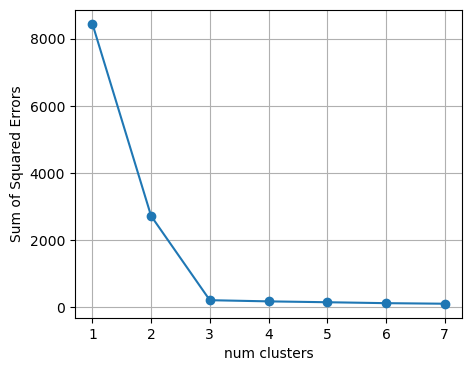

In [125]:
errors = []

for i in range(1,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(num_cluster_checker.inertia_)

plt.figure(figsize=(5,4))    
plt.plot(range(1,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid(True)
plt.show()

In [126]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmean.labels_)

0.8586603549973316

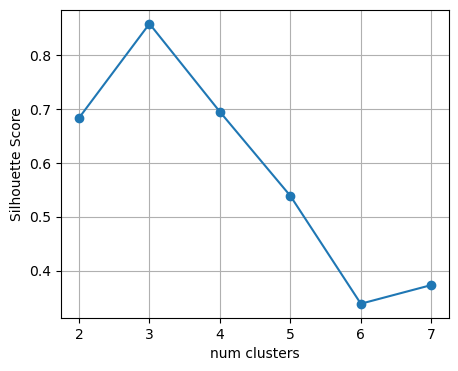

In [127]:
errors = []

for i in range(2,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(silhouette_score(X, num_cluster_checker.labels_))

plt.figure(figsize=(5,4))    
plt.plot(range(2,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [128]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [129]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [130]:
import PIL
image = np.asarray(PIL.Image.open(filepath))

In [131]:
image.shape

(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

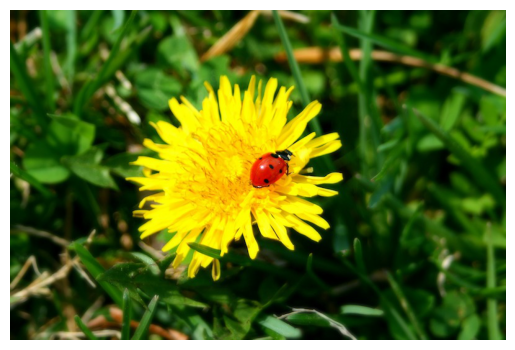

In [132]:
plt.imshow(image.astype('uint8'))
plt.axis("off")

In [133]:
XD = image.reshape(-1,3)

In [134]:
X = image.reshape(-1, 3)
kmean = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmean.cluster_centers_[kmean.labels_]
segmented_img = segmented_img.reshape(image.shape)

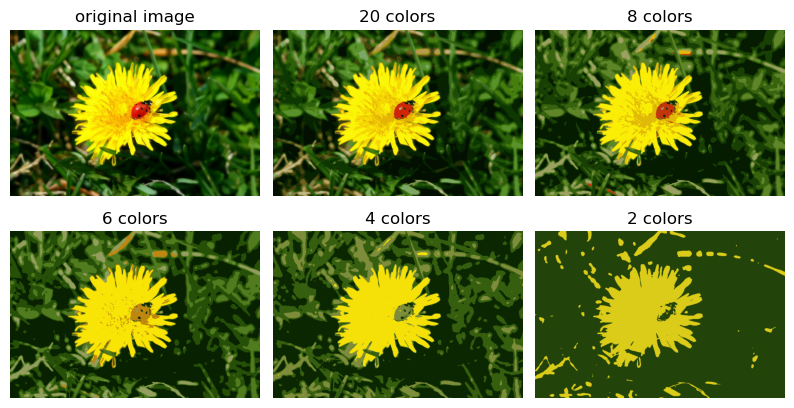

In [135]:
segmented_imgs = []
n_colors = [2,4,6,8,20]
n_colors.reverse()
for n_clusters in n_colors:
    kmean = KMeans(n_clusters, random_state=42).fit(X)
    segmented_img = kmean.cluster_centers_[kmean.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.1, wspace=0.05)

plt.subplot(2,3,1)
plt.title("original image")
plt.imshow(image)
plt.axis('off')

for indx, number_of_color in enumerate(n_colors):
    plt.subplot(2, 3, 2 + indx)
    plt.imshow(segmented_imgs[indx].astype("uint8"))
    plt.title(f"{number_of_color} colors")
    plt.axis('off')
plt.show()

In [136]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [137]:
from sklearn.linear_model import LogisticRegression
n_labled= 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:50],y_train[:50])

LogisticRegression(max_iter=10000)

In [138]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [139]:
k = 50
kmean = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmean.fit_transform(X_train)
representitive_digit_indx = np.argmin(X_digits_dist, axis=0)
X_representitve_digits = X_train[representitive_digit_indx]

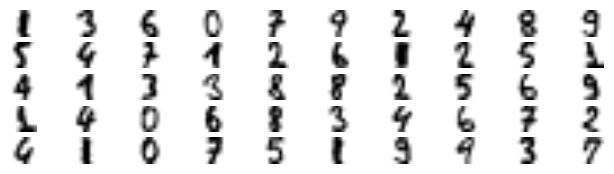

In [140]:
plt.figure(figsize=(8, 2))
for indx, image in enumerate(X_representitve_digits):
    plt.subplot(50// 10, 10, indx+1)
    plt.imshow(image.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [141]:
y_representative_digits = [1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 
                           5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 
                           4, 1, 3, 3, 8, 8, 2, 5, 6, 9, 
                           1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 
                           4, 1, 0, 7, 5, 1, 9, 9, 3, 7]
len(y_representative_digits)

50

In [142]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representitve_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [143]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k): #k is the number of labels we are using in this case it is 50
    y_train_propagated[kmean.labels_ == i] = y_representative_digits[i] #We do this to go from labels 0-49 to 0-9 to 'label' all the X_train

In [144]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8967254408060453

In [145]:
percentile_99 = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmean.labels_] 
for i in range(k):
    in_cluster = (kmean.labels_ == i)
    cluster_i_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_i_dist, percentile_99)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    #print(np.unique((in_cluster & above_cutoff), return_counts=True))
    X_cluster_dist[in_cluster & above_cutoff] = -1 #finds the outliers

partially_propogagated = (X_cluster_dist != -1)
X_train_partially_propogated = X_train[partially_propogagated]
y_train_partially_propogated = y_train_propagated[partially_propogagated]

In [146]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propogated, y_train_partially_propogated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [147]:
(y_train_partially_propogated == y_train[partially_propogagated]).mean() #checking how right we are about the new labels

0.9755555555555555

In [148]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1_000, noise=0.05)
dbscan = DBSCAN(min_samples=5, eps=0.05)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [149]:
dbscan.labels_[:100]

array([ 0,  0, -1,  0,  0,  1, -1,  7,  0,  0, -1,  2,  3,  0,  0,  4,  0,
        1,  0,  2, -1,  0,  2,  4, -1,  2,  0,  2,  2,  0,  0,  0,  0,  2,
        0,  4,  4,  4,  0,  0,  0,  3,  4,  0,  4,  0, -1, -1,  6,  0,  4,
        0,  4,  0,  0,  2,  2, -1,  0,  0,  0,  3,  4,  0,  4,  0,  4,  2,
       -1,  4,  0,  2, -1,  4,  3,  0,  0,  0,  2, -1,  0,  0,  0, -1,  1,
        0,  2,  0,  2,  0,  3,  2,  5,  5,  0,  4,  0,  0,  2,  0],
      dtype=int64)

In [150]:
print(len(dbscan.labels_))
print(len(dbscan.components_))

1000
811


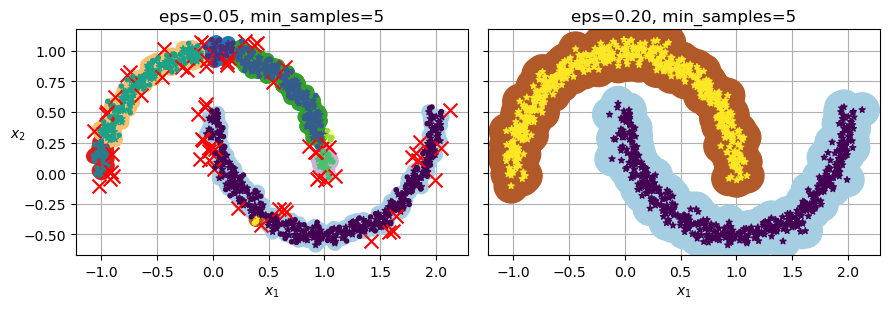

In [151]:

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [152]:
dbscan = dbscan2

In [153]:
from sklearn.neighbors import KNeighborsClassifier
#dbscan does not have a predict method so we are using KNN to do it
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [154]:
X_new = np.array([[-0.5, 0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0], dtype=int64)

In [155]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

In [156]:
y_dist, y_pred_indx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_indx]
y_pred[y_dist> 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [157]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [158]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [159]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [160]:
gm.predict_proba(X).round(3)

array([[0.977, 0.023, 0.   ],
       [0.983, 0.016, 0.001],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [161]:
print(gm.converged_)
print(gm.n_iter_)

True
4


In [162]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.6541591 ,  0.30905737],
       [ 0.68535975,  0.44337483],
       [ 0.69921549,  2.5228269 ],
       [ 0.99647101,  0.85292735],
       [ 0.51512744,  0.21103348],
       [-1.28860251,  1.93294772]])

In [163]:
y_new

array([0, 0, 0, 0, 0, 2])

In [164]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [165]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

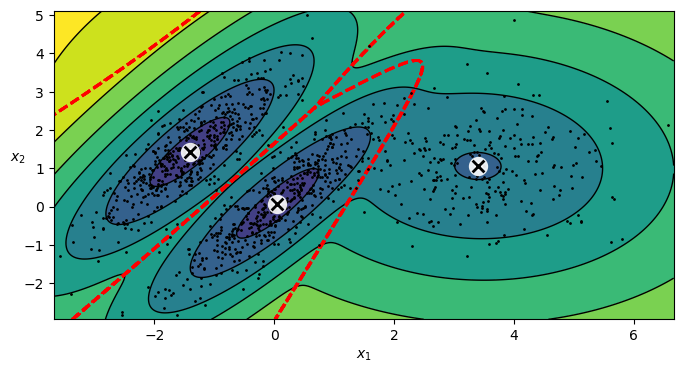

In [166]:
from matplotlib.colors import LogNorm

def plot_gaussian_mix(Clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = -Clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0,2,12))
    
    plt.contour(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0,2,12),
                 linewidths=1, colors='k')
    
    Z = Clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(Clusterer.means_, Clusterer.weights_)
    
    plt.xlabel('$x_1$')
    
    if show_ylabels:
        plt.ylabel('$x_2$', rotation=0)
    
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8,4))

plot_gaussian_mix(gm, X)

plt.show()

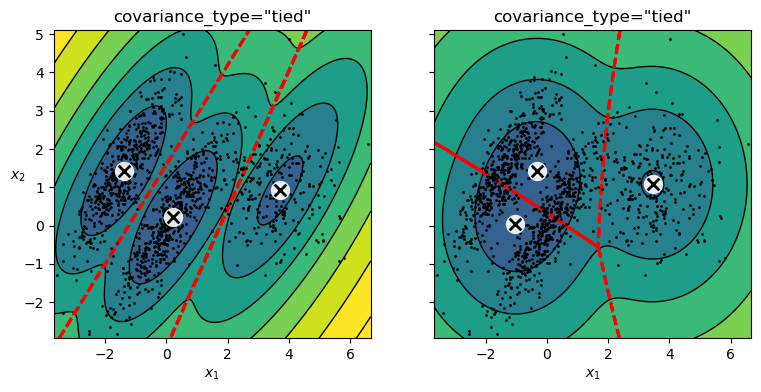

In [167]:

gm_tied = GaussianMixture(n_components=3, covariance_type='tied', n_init=10, random_state=42)
gm_spherical = GaussianMixture(n_components=3, covariance_type='spherical', n_init=10, random_state=42)
gm_diag = GaussianMixture(n_components=3, covariance_type='diag', n_init=10, random_state=42)
gm_full = GaussianMixture(n_components=3, covariance_type='full', random_state=42, n_init=10)

gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)
gm_full.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9,4))
    
    plt.subplot(121)
    plot_gaussian_mix(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')
    
    plt.subplot(122)
    plot_gaussian_mix(gm2,X, show_ylabels=False)
    plt.title(f'covariance_type="{gm1.covariance_type}"')
    
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

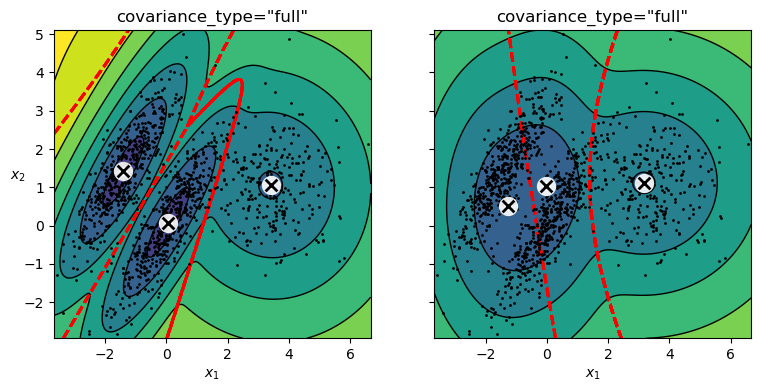

In [168]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.show()

In [169]:
densities = gm.score_samples(X)
density_threshold= np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

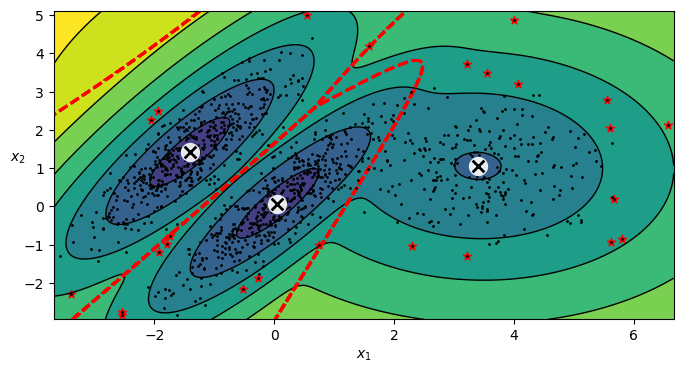

In [170]:
plt.figure(figsize=(8,4))

plot_gaussian_mix(gm, X)

plt.scatter(anomalies[:,0], anomalies[:,1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [171]:
print(gm.bic(X)) #bayes information criterion
print(gm.aic(X)) #Akaike information criterion

8189.733705221635
8102.508425106597


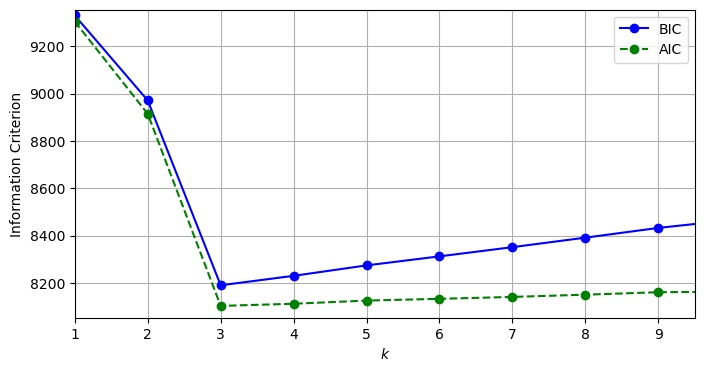

In [173]:
import warnings
warnings.filterwarnings('ignore')
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1,11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize= (8,4))
plt.plot(range(1,11), bics, "bo-", label="BIC")
plt.plot(range(1,11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1,9.5, min(aics) - 50, max(aics)+50])
plt.legend()
plt.grid()
plt.show()

In [174]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])